# **Classifying Song Genres Based off of Song Lyrics**

## Introduction
Natural language processing has achieved some impressive feats in recent years, such as automatic video transcription, ChatGPT like ChatGPT, and more. However, even the strongest natural language processing libraries can be limited by the quality of their input information, and not every dataset can provide clear distinctions or patterns between data. This project investigates one such case. 

The aim of this project is to determine how well one natural language processing algorithm, Bag of Words, can classify songs into genres based on only their lyrics. Bag of Words (BOW) is a natural language processing tool which creates vectors indicating the count of each word in a given sample, to allow textual data to be more easily compared. We predict that this will be a challenging application which cannot achieve near-perfect accuracy (>85%), because song lyrics and themes are often extremely similar across genres. However, by choosing the best classifier and hyperparameters within our options, we predict that our natural language processing model will be able to classify the songs significantly better than a "random choice" baseline model. 

We will tokenize and preprocess lyrics before entry into the Bag of Words algorithm, to ensure easily comparability between lyric sets. After preprocessing, to find the most accurate method of genre categorization, we will compare two methods of lyric entry, Word Count BOW and TF-IDF BOW. We will use sklearn’s TfidfVectorizer class to run BOW using TF-IDF classifications, and sklearn’s CountVectorizer class to run  BOW using word count.

To classify the vectors into genres, and compare the accuracy of word count vs TF-IDF vectors for BOW, we will use the Random Forest Method. We will use a test, train, validation split to tune the hyperparameters in Bag of Words and Random Forest to get our maximum accuracy with Random Forest model. Then, we will compare the results of the Random Forest classifier to the L-GBM classifier (a booster) to determine which of these two classification methods can give optimal results. 

At each step, we are using matplotlib and pandas to visualize the results.

## Dataset Description
For our project we used a large 72.8MB csv file called 'english_cleaned_lyrics' that holds 5 *useful* features with 218,210 songs or examples. The features that discribe each song include:

| Feature     | Property | Description|
| ----------- | ----------- |-----------|
| Song        | Categorical |Title of the song|
| Year        | Categorical |Year it was released|
| Artist      | Categorical |Who produced the song|
| Genre       | Categorical |Genre of the song|
|Lyrics       | Categorical |Every lyric (word) in the song|


The target labels in our experiment that we will use for classification are:

| Label    | Distribution |
| ----------- | ----------- |
| Pop         | 34137|
| Hip-hop     | 22654|
| Rock        | 10053|
| Metal       | 21210|
| Country     | 14158|
| Electronic  |  6942|
| Jazz        |  7310|
| Folk        |  1689|
| Indie       |  2935|
| R&B         |  3336|
| Other       |  3786|


This large dataset will improve our model accuracy, reduce over or underfitting, and ensure that our model is a scalable solution applicable to real world uses.

This dataset can be found at found at: https://github.com/hiteshyalamanchili/SongGenreClassification/blob/master/dataset/english_cleaned_lyrics.zip

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Here are the first 5 songs of our dataset

In [2]:
df = pd.read_csv("english_cleaned_lyrics.csv")
df.head()

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...


## Preprocess lyric data to remove stopwords & uppercase letters

In [4]:
df['lyrics'] = df['lyrics'].apply(lambda x: " ".join(x.lower() for x in x.split() if x.isalpha()))


## Process dataset into X (feature matrix), y (label array) format

In [5]:
#Create a feature matrix and labels vector from the given data.
X = df.iloc[:,:].values
y = df['genre']
X.shape

(218210, 7)

In [6]:
print (X[:1])

[[0 0 'ego-remix' 2009 'beyonce-knowles' 'Pop'
  'oh baby how you doing you know gonna cut right to the chase some women were made but me myself i like to think that i was created for a special purpose you know more special than you you feel me on baby get lost you need to call into work cause the boss for real want you to show me how you feel i consider myself lucky a big deal why well you got the key to my heart but you gonna need it rather you open up my body and show me secrets you know was inside no need for me to lie too big too wide too strong it fit too much too tough he talk like this cause he can back it up he got a big ego such a huge ego i love his big ego too much he walk like this cause he can back it up usually humble right now i choose you can leave with me or you could have the blues some call it arrogant i call it confident you decide when you find on what working with damn i know killing you with them legs better yet them thighs matter a fact my smile or maybe my eye

## Split Data into test, train, and validation sets


In [7]:
from sklearn.model_selection import train_test_split

lyrics_data = df['lyrics'].reset_index(drop=True)
genres_data = df['genre'].reset_index(drop=True)

#train = 70%, valid = 20%, test = 10%
X_train, X_test, y_train, y_test = train_test_split(
    lyrics_data, genres_data, test_size=0.3, random_state=5)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, test_size=0.33, random_state=5)

## Use CountVectorizer class to get BOW vectors based on words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = set(stopwords.words('english'))


In [9]:
def vectorizeBOWtraintestvalid(X_train, X_test, X_valid, min_df=None):
    if min_df != None: 
        bow_vectorizer = CountVectorizer(stop_words='english', analyzer='word', min_df=min_df)
    else:
        bow_vectorizer = CountVectorizer(stop_words='english', analyzer='word')
    
    X_train_bow = bow_vectorizer.fit_transform(X_train)
    X_valid_bow = bow_vectorizer.transform(X_valid)
    X_test_bow = bow_vectorizer.transform(X_test)
    
    return X_train_bow, X_test_bow, X_valid_bow

## Use TfidfVectorizer to get BOW based on Tf-IDF weighting class

In [10]:
# this bag of words generates a matrix based directly on TF-IDF weighting scale, for each song's lyrics
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorizeTFIDFtraintestvalid(X_train, X_test, X_valid, min_df = None):

    if min_df != None:
        tfidf_vectorizer = TfidfVectorizer(min_df=min_df, stop_words='english', analyzer='word')

    else:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english', analyzer='word')

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    X_valid_tfidf = tfidf_vectorizer.transform(X_valid)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf, X_valid_tfidf




## Using Random Forests predictions, tune min_df Hyperparameter on BOW, then Compare Accuracy on 2 BOW Types

In [11]:
from sklearn.ensemble import RandomForestClassifier

def run_random_forest(X_train, X_valid, y_train, y_valid, n_estimators=100, random_state=5, n_jobs=12):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=n_jobs)

    rf_classifier.fit(X_train, y_train)

    y_valid_pred_rf = rf_classifier.predict(X_valid)

    accuracy = np.mean(y_valid_pred_rf == y_valid)

    return accuracy


In [12]:
#iterate through the possible min_df hyperparameters in TF-IDF Vectorizer to find the optimal one
#accuracy is checked using Random Forest
min_df_values = [None, 0.1, 0.01, 0.05, 0.005, 0.001, 0.0005, 0.0003, 0.0001]

tfidf_tuples = []
accuracies_mindf = []

for min_df in min_df_values:
    X_train_tfidf, X_test_tfidf, X_valid_tfidf = vectorizeTFIDFtraintestvalid(X_train, X_test, X_valid, min_df=min_df)
    tfidf_tuples.append((X_train_tfidf, X_test_tfidf, X_valid_tfidf))

    accuracy = run_random_forest(X_train_tfidf, X_valid_tfidf, y_train, y_valid)
    accuracies_mindf.append(accuracy)
    print(f"Accuracy of TD-IDF BOW with min_df = {min_df}: {accuracy}")


Accuracy of TD-IDF BOW with min_df = None: 0.6029639762881897
Accuracy of TD-IDF BOW with min_df = 0.1: 0.5666438668490652
Accuracy of TD-IDF BOW with min_df = 0.01: 0.6101915184678522
Accuracy of TD-IDF BOW with min_df = 0.05: 0.5947104423164614
Accuracy of TD-IDF BOW with min_df = 0.005: 0.6133378932968536
Accuracy of TD-IDF BOW with min_df = 0.001: 0.6140218878248974
Accuracy of TD-IDF BOW with min_df = 0.0005: 0.6145234838121295
Accuracy of TD-IDF BOW with min_df = 0.0003: 0.6129958960328318
Accuracy of TD-IDF BOW with min_df = 0.0001: 0.6115595075239398


In [13]:
#iterate through the possible min_df hyperparameters in Word Count Vectorizer to find the optimal one
#accuracy is checked using Random Forest

bow_tuples = []
accuracies_mindf_bow = []

for min_df in min_df_values:
    X_train_bow, X_test_bow, X_valid_bow = vectorizeBOWtraintestvalid(X_train, X_test, X_valid, min_df=min_df)
    bow_tuples.append((X_train_bow, X_test_bow, X_valid_bow))

    accuracy = run_random_forest(X_train_bow, X_valid_bow, y_train, y_valid)
    accuracies_mindf_bow.append(accuracy)
    print(f"Accuracy of Word Count BOW with min_df = {min_df}: {accuracy}")

Accuracy of Word Count BOW with min_df = None: 0.6063611491108071
Accuracy of Word Count BOW with min_df = 0.1: 0.5672138622891016
Accuracy of Word Count BOW with min_df = 0.01: 0.6131326949384405
Accuracy of Word Count BOW with min_df = 0.05: 0.5982216142270862
Accuracy of Word Count BOW with min_df = 0.005: 0.6161194710442316
Accuracy of Word Count BOW with min_df = 0.001: 0.6170086639306885
Accuracy of Word Count BOW with min_df = 0.0005: 0.6173734610123119
Accuracy of Word Count BOW with min_df = 0.0003: 0.6164158686730506
Accuracy of Word Count BOW with min_df = 0.0001: 0.6141358869129047


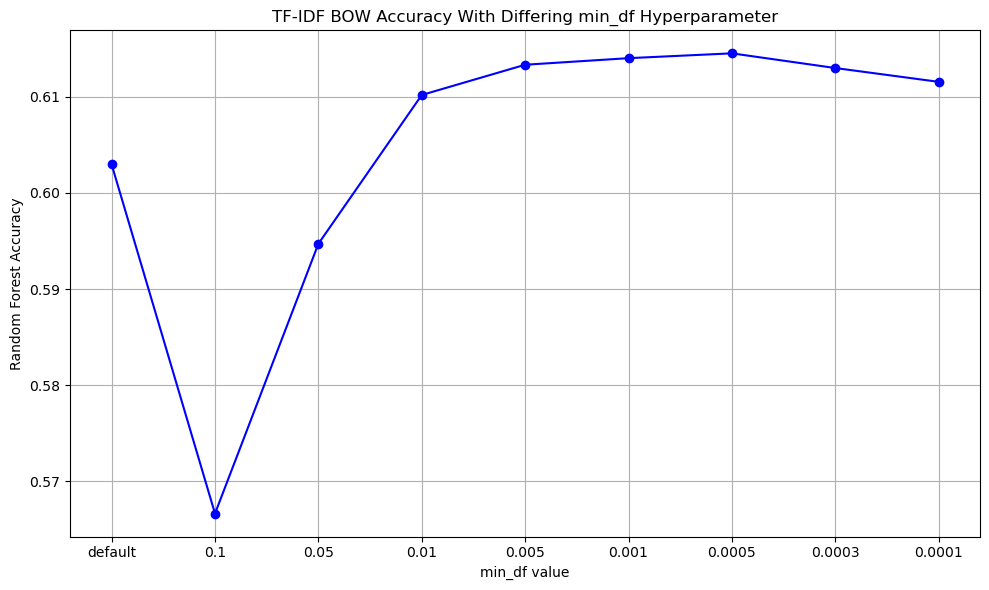

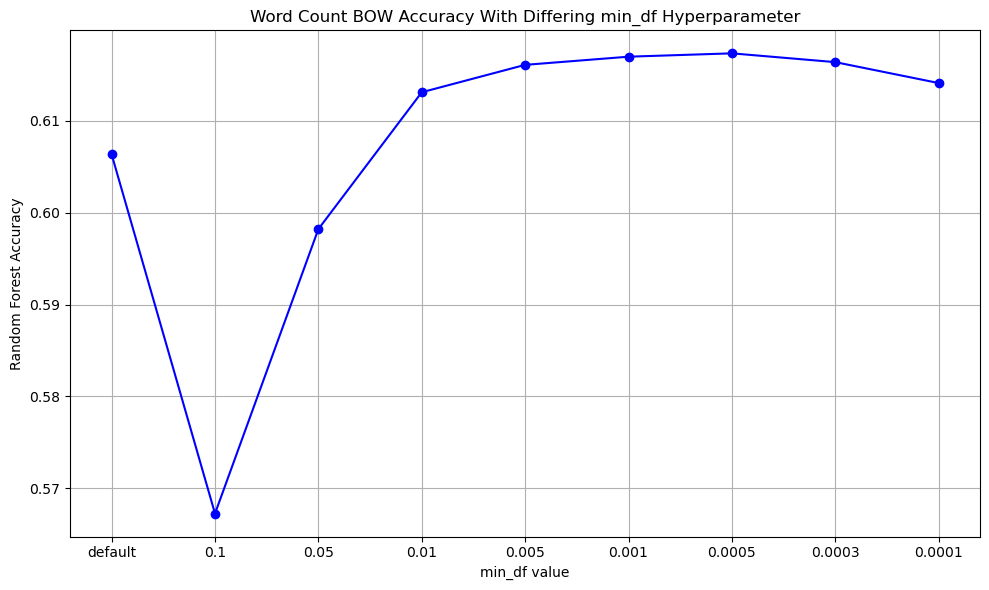

In [14]:
import matplotlib.pyplot as plt

# plot the accuracies at different mindf values for tfidf bow
#switched 2nd and 3rd index in all because I realized .01 and .05 were out of order
labels = ["default", "0.1", "0.01", "0.05", "0.005", "0.001", "0.0005", "0.0003", "0.0001"]
labels[2], labels[3] = labels[3], labels[2]
accuracies_mindf[2], accuracies_mindf[3] = accuracies_mindf[3], accuracies_mindf[2]
accuracies_mindf_bow[2], accuracies_mindf_bow[3] = accuracies_mindf_bow[3], accuracies_mindf_bow[2]

plt.figure(figsize=(10, 6))
plt.plot(labels, accuracies_mindf, marker='o', linestyle='-', color='b')
plt.title("TF-IDF BOW Accuracy With Differing min_df Hyperparameter")
plt.xlabel("min_df value")
plt.ylabel("Random Forest Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


# plot the accuracies at different mindf values for word count bow
plt.figure(figsize=(10, 6))
plt.plot(labels, accuracies_mindf_bow, marker='o', linestyle='-', color='b')
plt.title("Word Count BOW Accuracy With Differing min_df Hyperparameter")
plt.xlabel("min_df value")
plt.ylabel("Random Forest Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
max_accuracy_wordcount = max(accuracies_mindf_bow)
max_accuracy_tfidf = max(accuracies_mindf)

data = {
    "Max Accuracy with Word Count BOW": [max_accuracy_wordcount],
    "Max Accuracy with TF-IDF": [max_accuracy_tfidf]
}

df = pd.DataFrame(data)

print("Accuracy of Word Count BOW vs TF-IDF with Optimal min_df")
df

Accuracy of Word Count BOW vs TF-IDF with Optimal min_df


,Max Accuracy with Word Count BOW,Max Accuracy with TF-IDF
0,0.617373,0.614523


In [17]:

data = {
    "Best min_df Constant Word Count BOW": [".0005"],
    "Best min_df Constant TF-IDF": [".0005"]
}

df = pd.DataFrame(data)
print("Optimal Constants for Word Count vs TF-IDF BOW")
df

Optimal Constants for Word Count vs TF-IDF BOW


,Best min_df Constant Word Count BOW,Best min_df Constant TF-IDF
0,.0005,.0005


## Methods 1: Data Input, Preprocessing, Bag of Words Vectorizer, & Hyperparameter Tuning for Bag of Words

#### Preprocessing:
Initially, we brought in the dataset using pandas read_csv method. We then separated the data into a train, validation, 
and test set, with splits of train = 70%, valid = 20%, test = 10%. The validation set will be used for tuning our 
hyperparameters, and the test set will be used for determining the "real world" accuracy of our dataset after hyperparameters are tuned. 

Before running the dataset through Bag of Words, we process all of the lyrics to be lowercase, so that the same word in uppercase and lowercase will be classified the same in the vectors. We also process the data to remove english stopwords. This includes words like the, and, it, on, which are so common that they are not helpful to the analysis. We did not have to remove punctuation, because this was already removed in the starting dataset. 

We did not standardize the data, because we are using Random Forests and L-GBM as our classifiers, and standardization does not tend to be helpful in either of these methods. 

#### Bag of Words Vectorizers and TF-IDF:

Next, we run our lyrics data through two types of Bag of Words Vectorizers - CountVectorizer and TfidfVectorizer. Word Count Bag of Words Vectorizer turns the list of lyrics into vectors of count for each word. For example if we had just two songs:

Song1: lyrics = "jingle bells jingle bells jingle all the way"
Song2: lyrics = "here comes the sun here comes the sun its alright"

The resultant word count vectors for row1 = Song1, row2 = Song2 would be something like:

\[3, 2, 1, 1, 1, 0, 0, 0, 0\]  
\[0, 0, 0, 2, 0, 2, 1, 1, 1\]

corresponding to the labels:

\[jingle, bells, all, the, way, here, comes, sun, alright\]

The TF-IDF Vectorizer creates similar vectors, except that the value of each feature (word) is a TF-IDF score, instead of the direct word count. A TF-IDF score gives words scores based on the number of times it shows up in a particular song, and the number of times it shows up in other songs. Words with the highest score will be ones that show up frequently in one song, but less frequently in all other songs. The purpose of this is to decrease the feature importance of words like "the" or "and", which show up in just about every song, and are therefore not as relevant for classification.

#### BOW Hyperparameter tuning, and Comparison Between 2 BOW Methods (TF-IDF vs Word Count)

TF-IDF Bag of Words and word count Bag of Words both use a min-df hyperparameter, which specifies what percentage of documents a word should be present in in order to be included in the final matrix. So if a word only shows up in a single song, and we have 250,000 songs, then that word will be dropped from the final matrix at a min_df of .1. The word would need to be in 2500 songs to be included in the final matrix, at this min_df value. We compare a wide range of min_df hyperparameters on the same train and validation set, to determine which will result in the best performance.

Our results show that .0005 is the best min_df constant for both TF-IDF and word count bow, giving accuracy of 61.45% and 61.73%, respectively, on the validation set. The accuracy of Word Count BOW is actually slightly higher than the TF-IDF BOW. For this reason, we will use the word count BOW (CountVectorizer) with a min_df of .0005 for our predictions.

The higher performance of word count than TF-IDF could be because TF-IDF gives a lower rating to words that show up across many songs (because of the IDF portion) and these words may be helpful for classification of similar genres.

## Run Random Forests on Test, Train, and Validation Set Vectors with Multiple constant (num_component) Values, to Determine the Optimal Constant

In [19]:
X_train_wordCount_0005, X_test_wordCount_0005, X_valid_wordCount_0005 = bow_tuples[6]

In [20]:
# Frequently, more n_estimators (more decision trees being compared in the random forest) increases
# the accuracy. We see if an increased or decreased n_estimators value will improve accuracy here.

n_estimators_values = [10, 100, 200, 300]

# Initialize a list to store accuracies
accuracies_nestimators = []

for val in n_estimators_values:
    accuracy = run_random_forest(X_train_wordCount_0005, X_valid_wordCount_0005, y_train, y_valid, n_estimators=val)
    accuracies_nestimators.append(accuracy)

Accuracy of Random Forest with n_estimators = 10
0.596625626994984
Accuracy of Random Forest with n_estimators = 100
0.6173734610123119
Accuracy of Random Forest with n_estimators = 200
0.6175102599179206
Accuracy of Random Forest with n_estimators = 300
0.6168034655722754


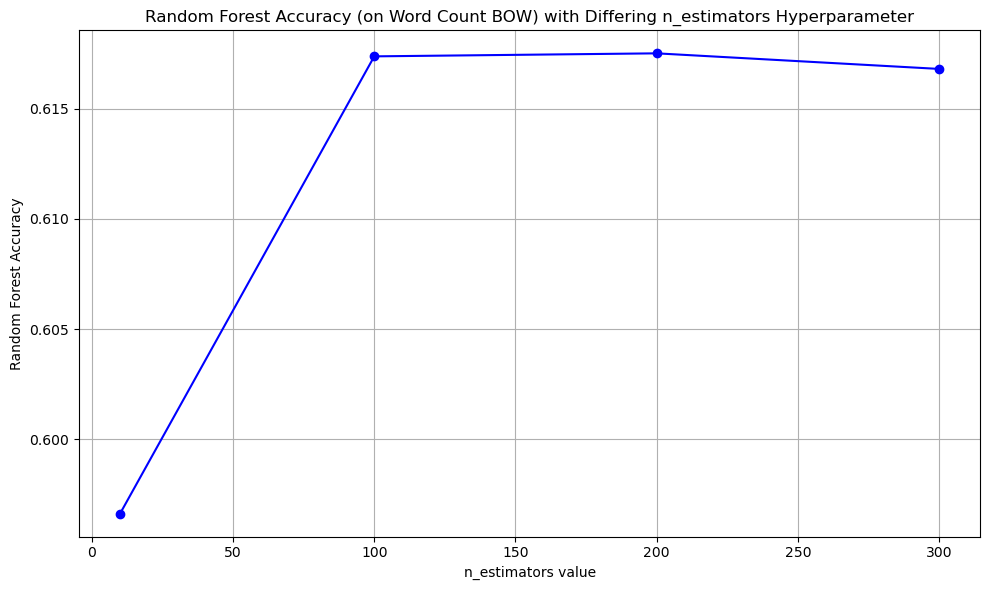

In [21]:
# we visualize the results of our n_estimators test runs .
for i in range(len(accuracies_nestimators)):
    print("Accuracy of Random Forest with n_estimators = " + str(n_estimators_values[i]))
    print(accuracies_nestimators[i])

import matplotlib.pyplot as plt

# plot accuracies at different num_components for random forest on Word Count
labels = [10, 100, 200, 300]

plt.figure(figsize=(10, 6))
plt.plot(labels, accuracies_nestimators, marker='o', linestyle='-', color='b')
plt.title("Random Forest Accuracy (on Word Count BOW) with Differing n_estimators Hyperparameter")
plt.xlabel("n_estimators value")
plt.ylabel("Random Forest Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()

## Run Word Count BOW Random Forest on Test Set with Optimal HyperParameters

In [22]:
accuracy_rf_optimal = run_random_forest(X_train_wordCount_0005, X_test_wordCount_0005, y_train, y_test, n_estimators=100)
print("Accuracy of Word Count Random Forest on Test set With Optimal HyperParameters (min_df = .0005, n_estimators = 100): ")
print(accuracy_rf_optimal)

Accuracy of Word Count Random Forest on Test set With Optimal HyperParameters (min_df = .0005, n_estimators = 100): 
0.6139887978521502


## Methods 2: Tune Random Forests Hyperparameter, and Determine "Real World" Accuracy:

#### Hyperparameter Tuning for Random Forest
Now that we have determined that Word Count is the best Bag of Words method, and that min_df = .0005 is its optimal hyperparameter, we want to tune the hyperparameter for the Random Forest classifier.

The n_estimators parameter in random forests specifies the number of separate decision trees which will be used to get the final prediction on a data point. Since random forests are resilient to overfitting, a high n_estimators value typically improves the results. However, a higher n_estimators value also can increase the runtime, so we want to find the point where increasing the n_estimators values does not significantly increase the accuracy anymore, and stop there. 

Our results show that an n_estimators value of 200 provides the best results, with 61.75% accuracy. However this is almost identical to the accuracy at 100 n_estimators, with 61.74% accuracy, and 100 n_estimators runs signficantly faster. For this reason, we opt to use n_estimators = 100.

#### Test Set Accuracy For Random Forest with Optimal Hyperparameters and BOW Choice

Now that the optimal BOW classifier choice (Word Count), BOW hyperparameter (min_df = .0005) and random forest hyperparameter (n_estimators = 100) have been determined, we run our classifier on the test set, to get an estimate of how we could expect this classifier to behave in the "real world". This gives us an accuracy of 61.40%. 

## Determine if a Booster (L-GBM) can get better results than Random Forest Algorithm

In [23]:
# l-GBM is a booster which is similar to random forests, but has slight alterations which often
# produce better results. We run our data through L-GBM to determine if this can produce better results

import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# we need to convert our labels to a number form for this so it can work with it
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# data needs to be converted into lgb datasets so that it can work with it
X_train_wordCount_0005 = X_train_wordCount_0005.astype(float)
X_valid_wordCount_0005 = X_valid_wordCount_0005.astype(float)
X_test_wordCount_0005 = X_test_wordCount_0005.astype(float)
train_data = lgb.Dataset(X_train_wordCount_0005, label=y_train_encoded)
valid_data = lgb.Dataset(X_valid_wordCount_0005, label=y_valid_encoded, reference=train_data)
test_data = lgb.Dataset(X_test_wordCount_0005, label=y_test_encoded, reference=train_data)

# we set some hyperparameters specifying how the l-gbm should be run. We use light grandient boosting
# machine as the boosting type, we indicate that it is multiclass and how many classes there are, and
# we specify that there should be 300 boosting rounds.
params = {
    "boosting_type": "gbdt",
    "objective": "multiclass",
    "num_class": len(label_encoder.classes_),
    "num_round": 300,
}

# we fit and predict genres, as numbers
bst = lgb.train(params, train_data, valid_sets=[valid_data])
y_pred = bst.predict(X_valid_wordCount_0005, num_iteration=bst.best_iteration)
y_pred_testset = bst.predict(X_test_wordCount_0005, num_iteration=bst.best_iteration)

# we convert the number genre predictions back into string labels
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_pred_testset_labels = label_encoder.inverse_transform(np.argmax(y_pred_testset, axis=1))

gbm_accuracy = np.mean(y_valid == y_pred_labels)
print("Accuracy of L-GBM Booster on Word Count BOW Data (Validation Set) with 300 Boosting Rounds: ")
print(gbm_accuracy)

gbm_testset_accuracy = np.mean(y_test == y_pred_testset_labels)
print("Accuracy of L-GBM Booster on Word Count BOW Data (Test Set) with 300 Boosting Rounds: ")
print(gbm_testset_accuracy)

C:\Users\Nicole\miniconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.362081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72457
[LightGBM] [Info] Number of data points in the train set: 152747, number of used features: 8983
[LightGBM] [Info] Start training from score -2.741515
[LightGBM] [Info] Start training from score -3.452075
[LightGBM] [Info] Start training from score -4.865814
[LightGBM] [Info] Start training from score -2.272133
[LightGBM] [Info] Start training from score -4.296415
[LightGBM] [Info] Start training from score -3.393872
[LightGBM] [Info] Start training from score -2.327690
[LightGBM] [Info] Start training from score -4.053469
[LightGBM] [Info] Start training from score -1.849189
[LightGBM] [Info] Start training from score -4.178632
[LightGBM] [Info] Start training from score -0.780259
Accuracy of L-GBM Booster on Word Count BOW Data 

## Compare Best Accuracy to Baseline

In [25]:
baseline = 1/(len(label_encoder.classes_))

data = {
    "L-GBM Test Set Accuracy": [gbm_testset_accuracy],
    "Random Forest Set Set Accuracy (w Optimal Hyperparameters)": [accuracy_rf_optimal],
    "Baseline Accuracy (Random Genre Choice)": [baseline]
}

df = pd.DataFrame(data)

print("Test Set Accuracy of L-GBM vs. Random Forest vs. Baseline (on Word Count BOW)")
df

Test Set Accuracy of L-GBM vs. Random Forest vs. Baseline (on Word Count BOW)


,L-GBM Test Set Accuracy,Random Forest Set Set Accuracy (w Optimal Hyperparameters),Baseline Accuracy (Random Genre Choice)
0,0.612415,0.613989,0.090909


## Methods 3: Compare Random Forest L-GBM Booster, and Compare Best Results to Baseline
    
L-GBM (Light Gradient Boosting Machine) is a boosting algorithm which is similar to Random Forests, but can sometimes be more accurate. We run our same training set through L-GBM to see if it can give better results than our best random forest prediction. As shown in the pandas dataframe above, L-GBM gives us an accuracy of 61.24% on the test set, which is slightly worse than our Random Forest test set results of 61.39%. After finding the most accurate classifier (Random Forest), we compare our results against baseline, which we calculate by randomly choosing among the genres. 

## Results

Our comparison of TF-IDF Bag of Words to Word Count Bag of Words showed that both had very similar accuracy showed that a min_df constant of .0005 was best for both TF-IDF and word count bow, giving accuracy of 61.45% and 61.73%, respectively, on the validation set. The accuracy of Word Count BOW was actually slightly higher than the TF-IDF BOW, so Word Count BOW was chosen to use.

When comparing our Random Forest classifier (with optimal hyperparameters) and L-GBM on the TWord Count BOW data, we found that Random Forest was slightly more accurate on the test set. As displayed in the pandas df above, random forest had an accuracy of 61.40% whereas L-GBM had an accuracy of 61.24%. So, while they were extremely similar, Random Forest had slightly more accurate results on the test set. 

By comparing our best results (Random Forest, at 61.40% accuracy) to our baseline accuracy, (from a Random Choice of genres) of 0.09, we found that our classifier was much more successful than baseline. 

While an accuracy of 61.40% is not as high as some classifiers, this is likely due to the nature of a classification based solely on lyrics, and the similarity of lyrics and themes in songs across multiple genres. Songs of different genres may sometimes have such similar themes and lyrics that no classifier could accurately classify all songs based on lyrics alone. In order to reach significantly higher accuracy, we would likely have to bring in additional features about the songs, such as tempo, chord pattern, etc. to assist with the classification. 
